### 02. Neural Network classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

## 1. Make classifiation data and get it ready

In [286]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [287]:
len(X), len(y)

(1000, 1000)

In [288]:
print(f'First 5 sample of X:\n {X[:5]}')
print(f'First 5 sample of y:\n {y[:5]}')

First 5 sample of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y:
 [1 1 1 1 0]


In [289]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label" : y})

circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [290]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

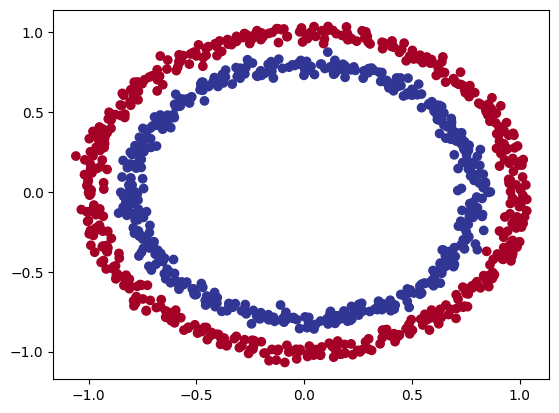

In [291]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note**: the data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamental

## 1.1 Check input and output shapes

In [292]:
X.shape, y.shape

((1000, 2), (1000,))

In [293]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [294]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample X: (2,) and the same for y: ()


## 1.2 Turn data into tensors and create train and test splits

In [295]:
import torch
torch.__version__

'2.0.1+cu118'

In [296]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [297]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [298]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [299]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% will be test and 80% will be train
                                                    random_state=42)

In [300]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

##  Building a model

Let's build a model to classify our blue and red dots

to do so, we want to :
1. Setup device agonistic code so our code will rn on an sccelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. create a training and test loop

In [301]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Now we've setup device agnostic code, let's create a model that:

1. Subclasswss `nn.module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2  `nn.Linear()` layers that are ccapable of handling the shape of our data
3. Defines a `forward()` method that outline the forward pass (or forward computation) of the model
4. Instatiate and instance of our model class ans send it to the target `device`

In [302]:
X_train.shape

torch.Size([800, 2])

In [303]:
y_train[:5], y_train.shape

(tensor([1., 0., 0., 0., 1.]), torch.Size([800]))

In [304]:
# 1. Construct the model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shape of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

    # self.two_linear_layers = nn.Sequential(
    #     nn.Linear(in_features=2, out_features=5),
    #     nn.Linear(in_features=5, out_features=1)
    # )

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return  self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    # return self.two_linear_layers(x)

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [305]:
next(model_0.parameters()).device, device

(device(type='cuda', index=0), 'cuda')

In [306]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [307]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [308]:
#  Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 Label: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 Label: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [309]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function ans optimizer

Which loss function or optimizer should you use?

This is problem specific

For example, for regression -> MAE ir MSE (mean absolute error or mean squared error)

For classification -> binary cross entropy or categorical ross entropy (cross entropy)

As a reminder, the loss function measures how **wrong** your model predictions are

and for optimizer, two of the most common and useful are SGD and Adam, however, PyTorch has many build-in options

* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`



In [310]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to hae gone through the sigmiod activation function prior to input to BCELoss
# nn.Sequencial(
    # nn.Sigmoid(),
    # nn.BCELoss()
# )
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [311]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


## 3. Train model

To train our model, we're going to need to build a traiing loop with the followig step:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> predictio labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into the **prediction probabilities** by pass them to some kind of activation function (e.g. sigmoid for binary classifiation and softmax for multiclass classifiation).


Then we can convert our models' prediction probabilities to **prediction labels** to **prediction labels** by either rounding them ot taking the `argmax()`.

In [312]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
  y_logits

In [313]:
# Let/s replicate the model above using n.Sequential()
# model_0 = nn.Sequential(
#     nn.Linear(in_features=2, out_feathers=5)
#     nn.Linear(in_features=5, out_feathers=1)
# ).to(device)

In [314]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [315]:
#  Use the sigmoid activation function on the logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our prediction probabilities value, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y = 1` (class 1)
* `y_pred_probs` < 0.5, `y = 0` (class 0)

In [316]:
# torch.round(y_pred_probs)

# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred procs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#  Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#  Get rid of extra dimention
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

### 3.2 Building a training and testing loop

In [317]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#  Set then number of epochs
epochs = 1000

#  Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# Build training and evaluation loop
for epoch in range(epochs):
  # Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze() # remove extra one dimention
  y_pred =  torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2.Calculate loss / accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction porbability as input
  #                y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss Backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode(): # not training, no need gradient
    # 1. Forward Pass
      test_logits = model_0(X_test).squeeze()
      test_pred =  torch.round(torch.sigmoid(test_logits))

      #  2. Calculate the test loss / accuracy
      test_loss  = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)
  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc : {acc:.2f}% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69796, Acc : 51.88% | Test loss: 0.69440, Test Acc: 58.00%
Epoch: 10 | Loss: 0.69590, Acc : 51.25% | Test loss: 0.69305, Test Acc: 53.00%
Epoch: 20 | Loss: 0.69490, Acc : 51.62% | Test loss: 0.69254, Test Acc: 49.50%
Epoch: 30 | Loss: 0.69435, Acc : 51.12% | Test loss: 0.69236, Test Acc: 49.50%
Epoch: 40 | Loss: 0.69401, Acc : 50.88% | Test loss: 0.69232, Test Acc: 51.00%
Epoch: 50 | Loss: 0.69378, Acc : 50.25% | Test loss: 0.69234, Test Acc: 50.00%
Epoch: 60 | Loss: 0.69362, Acc : 50.00% | Test loss: 0.69239, Test Acc: 51.50%
Epoch: 70 | Loss: 0.69351, Acc : 50.25% | Test loss: 0.69246, Test Acc: 51.00%
Epoch: 80 | Loss: 0.69342, Acc : 49.88% | Test loss: 0.69254, Test Acc: 50.00%
Epoch: 90 | Loss: 0.69336, Acc : 49.88% | Test loss: 0.69262, Test Acc: 53.00%
Epoch: 100 | Loss: 0.69331, Acc : 49.25% | Test loss: 0.69271, Test Acc: 53.00%
Epoch: 110 | Loss: 0.69327, Acc : 49.75% | Test loss: 0.69279, Test Acc: 54.00%
Epoch: 120 | Loss: 0.69324, Acc : 50.25% | Test los

## 4. Make predictions and evaluation the model

From the metric it look like our model is't learning anything

so to inspect it lets make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()`

source: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [318]:
import requests, json
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already download)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print('Download helper_function.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_decision_boundary, plot_predictions

helper_functions.py already exists, skipping download


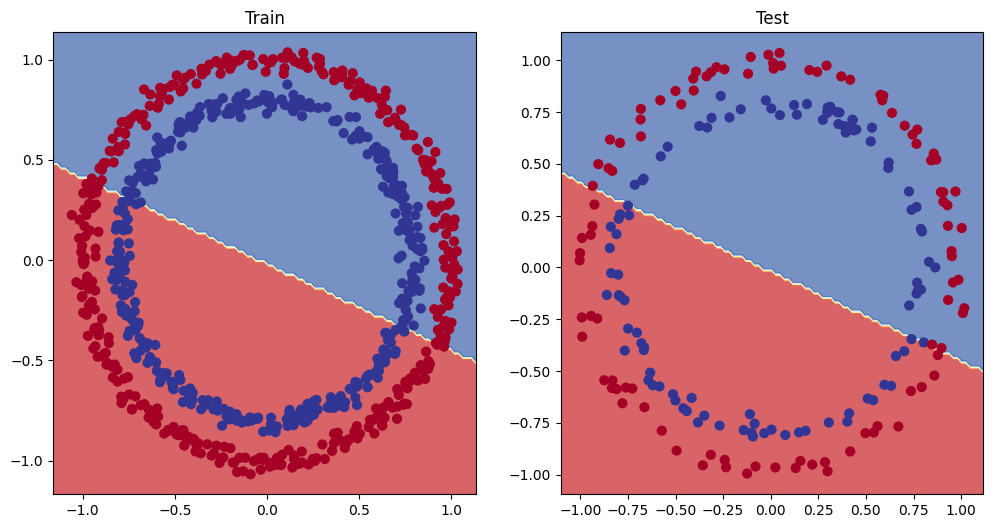

In [319]:
#  Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden layers/units - go from 5 hidden uits to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These optios atr all from a model's perpective because they deal directly with the model, rather than the data

And because these options are all values we (as machine learning engineers and data scientist) can change, they are referred to as **hyperparameters**

Let's try to improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

(Normally, we would change one at a time, which is an improvement and which is degradation -> experiment tracking)

In [320]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10) # in_features -> shape of X+train
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1) # out_features -> shape of y_train

  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z # self.layer_3(self.layer_2(self.layer_1(x))) -> this way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [321]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [322]:
# Write a training and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

  # 2. Cauculate the loss / accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caucalate the loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc : {acc:.2f}% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")






Epoch: 0 | Loss: 0.69396, Acc : 50.88% | Test loss: 0.69261, Test Acc: 51.00%
Epoch: 10 | Loss: 0.69369, Acc : 50.25% | Test loss: 0.69270, Test Acc: 50.00%
Epoch: 20 | Loss: 0.69351, Acc : 50.12% | Test loss: 0.69283, Test Acc: 49.50%
Epoch: 30 | Loss: 0.69339, Acc : 50.50% | Test loss: 0.69297, Test Acc: 48.00%
Epoch: 40 | Loss: 0.69329, Acc : 50.38% | Test loss: 0.69310, Test Acc: 49.00%
Epoch: 50 | Loss: 0.69322, Acc : 49.88% | Test loss: 0.69324, Test Acc: 50.00%
Epoch: 60 | Loss: 0.69317, Acc : 49.38% | Test loss: 0.69336, Test Acc: 51.50%
Epoch: 70 | Loss: 0.69312, Acc : 49.38% | Test loss: 0.69348, Test Acc: 50.50%
Epoch: 80 | Loss: 0.69309, Acc : 50.12% | Test loss: 0.69359, Test Acc: 50.00%
Epoch: 90 | Loss: 0.69307, Acc : 50.50% | Test loss: 0.69370, Test Acc: 48.50%
Epoch: 100 | Loss: 0.69305, Acc : 50.38% | Test loss: 0.69379, Test Acc: 48.00%
Epoch: 110 | Loss: 0.69303, Acc : 50.88% | Test loss: 0.69388, Test Acc: 46.50%
Epoch: 120 | Loss: 0.69302, Acc : 50.75% | Test los

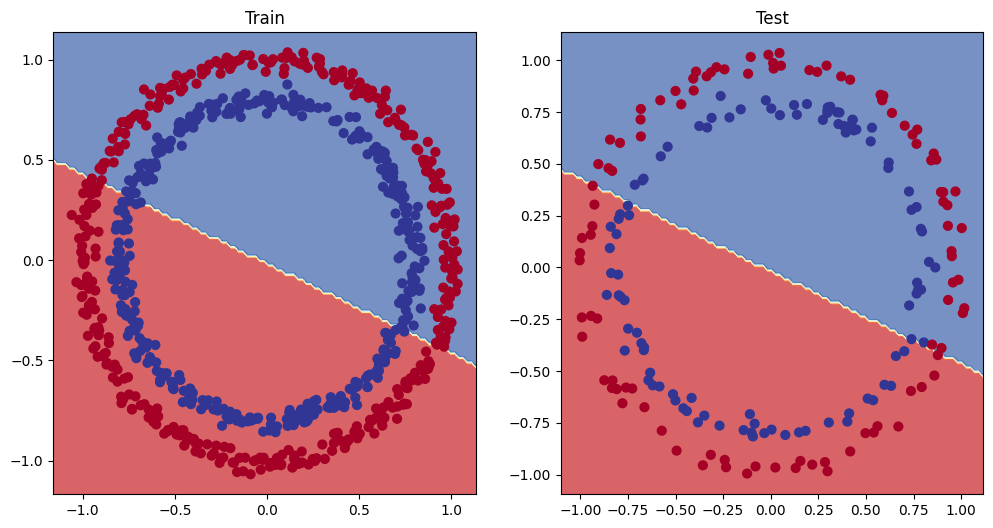

In [323]:
#  Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a large problem is to test out a smaller problem

In [324]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = (weight * X_regression) + bias # Linear regression formula (without epsilon)

#  Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [325]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check length of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

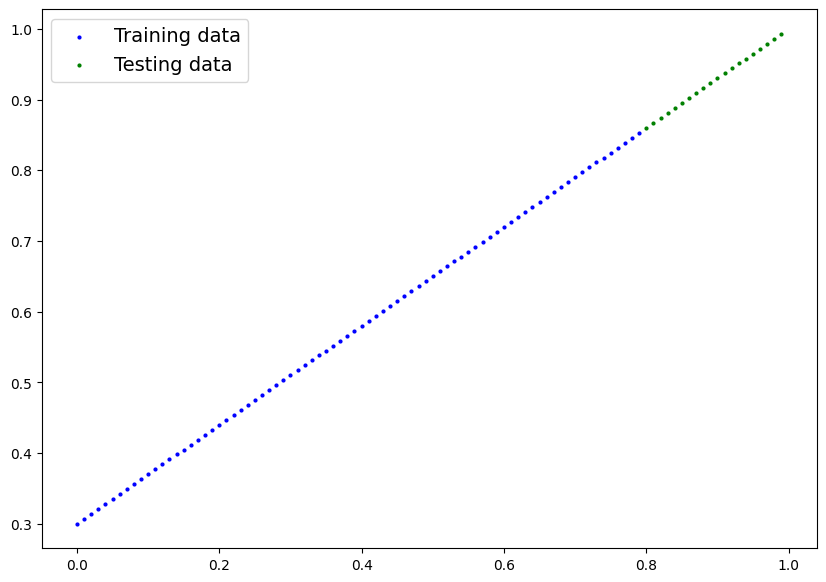

In [326]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 )

### 5.2 Adjusting `model_1` to it the straight line



In [327]:
# Same architecture as model_1 (but using nn.Sequestial())

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1),
).to(device)


model_2


Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [328]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [329]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [330]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#  Set the number of epochs
epochs = 3000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

#  Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.54143
Epoch: 100 | Loss: 0.09309 | Test loss: 0.02901
Epoch: 200 | Loss: 0.07376 | Test loss: 0.02850
Epoch: 300 | Loss: 0.06745 | Test loss: 0.00615
Epoch: 400 | Loss: 0.06107 | Test loss: 0.02004
Epoch: 500 | Loss: 0.05698 | Test loss: 0.01061
Epoch: 600 | Loss: 0.04857 | Test loss: 0.01326
Epoch: 700 | Loss: 0.06109 | Test loss: 0.02127
Epoch: 800 | Loss: 0.05599 | Test loss: 0.01426
Epoch: 900 | Loss: 0.05571 | Test loss: 0.00603
Epoch: 1000 | Loss: 0.06466 | Test loss: 0.02598
Epoch: 1100 | Loss: 0.05518 | Test loss: 0.00679
Epoch: 1200 | Loss: 0.07117 | Test loss: 0.01923
Epoch: 1300 | Loss: 0.05287 | Test loss: 0.00530
Epoch: 1400 | Loss: 0.07116 | Test loss: 0.00436
Epoch: 1500 | Loss: 0.04987 | Test loss: 0.00735
Epoch: 1600 | Loss: 0.04989 | Test loss: 0.00927
Epoch: 1700 | Loss: 0.05846 | Test loss: 0.00987
Epoch: 1800 | Loss: 0.05230 | Test loss: 0.00454
Epoch: 1900 | Loss: 0.04446 | Test loss: 0.02777
Epoch: 2000 | Loss: 0.05256 | Te

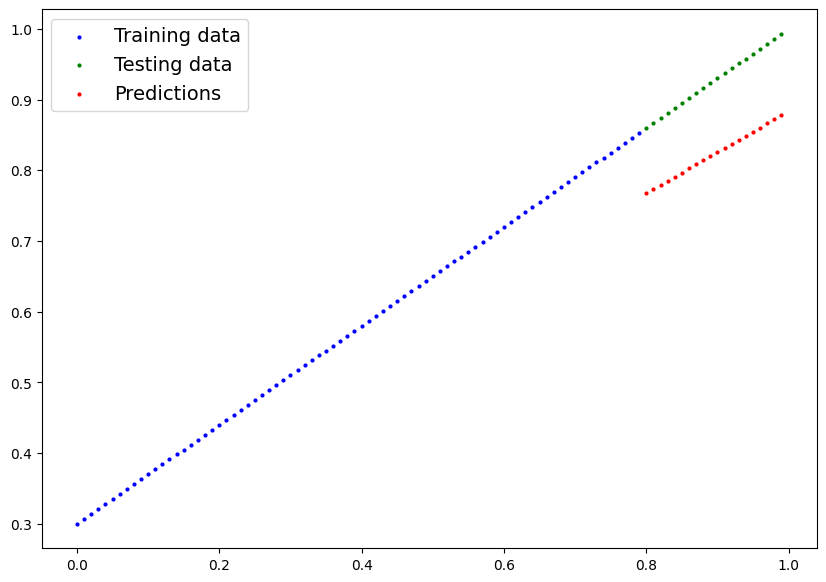

In [331]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## 6. The missing piece: no-linearity

"What patterns couldyou draw if you were given an infiite amount of straight and non-straight lines?"

Or in machine learning terms, an infinite (but really is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

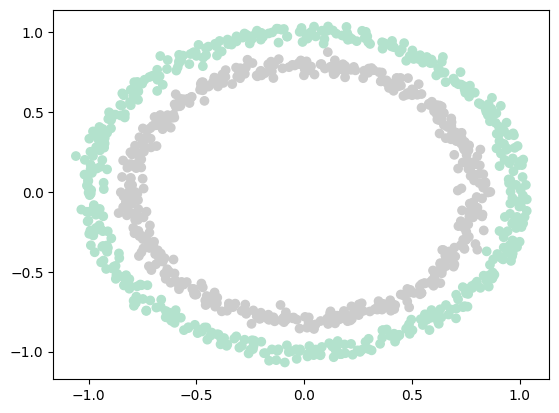

In [332]:
#  Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Pastel2)

In [333]:
X, X[1, 0]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 -0.7561588822214413)

In [334]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

`https://pytorch.org/docs/stable/nn.html`

* Linear = straight line
* Non-linear = non-straight line

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data

In [335]:
# Build a model with none-linear activation functions
# nn.ReLU -> turn negative num to zero and leave positive num as it is
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu    = nn.ReLU() # relu is a non-linear activatio function

  def forward(self, x):
    # Where should we put our non-linear activation functions? -> in-between layers
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [336]:
#  Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

### 6.3 Training a model with non-linearity

In [337]:
# Write a training and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set epoch
epochs = 2000

# Put the data in the target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  # set model to training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze() # squeeze will remove one dimention from the shape
  y_pred   = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Test
  # set model to test
  model_3.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred   = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc  = accuracy_fn(y_true=y_test,
                            y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc : {acc:.2f}% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69295, Acc : 50.00% | Test loss: 0.69319, Test Acc: 50.00%
Epoch: 100 | Loss: 0.69115, Acc : 52.88% | Test loss: 0.69102, Test Acc: 52.50%
Epoch: 200 | Loss: 0.68977, Acc : 53.37% | Test loss: 0.68940, Test Acc: 55.00%
Epoch: 300 | Loss: 0.68795, Acc : 53.00% | Test loss: 0.68723, Test Acc: 56.00%
Epoch: 400 | Loss: 0.68517, Acc : 52.75% | Test loss: 0.68411, Test Acc: 56.50%
Epoch: 500 | Loss: 0.68102, Acc : 52.75% | Test loss: 0.67941, Test Acc: 56.50%
Epoch: 600 | Loss: 0.67515, Acc : 54.50% | Test loss: 0.67285, Test Acc: 56.00%
Epoch: 700 | Loss: 0.66659, Acc : 58.38% | Test loss: 0.66322, Test Acc: 59.00%
Epoch: 800 | Loss: 0.65160, Acc : 64.00% | Test loss: 0.64757, Test Acc: 67.50%
Epoch: 900 | Loss: 0.62362, Acc : 74.00% | Test loss: 0.62145, Test Acc: 79.00%
Epoch: 1000 | Loss: 0.56818, Acc : 87.75% | Test loss: 0.57378, Test Acc: 86.50%
Epoch: 1100 | Loss: 0.48153, Acc : 93.50% | Test loss: 0.49935, Test Acc: 90.50%
Epoch: 1200 | Loss: 0.37056, Acc : 97.75

In [338]:
# .squeeze() example
#  x = torch.tensor([[2, 1, 2, 1, 2]])
#  y = torch.squeeze(x)
#  x, y, x.shape, y.shape

### 6.4 Evaluating a model trained with non-linear activation function



In [339]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

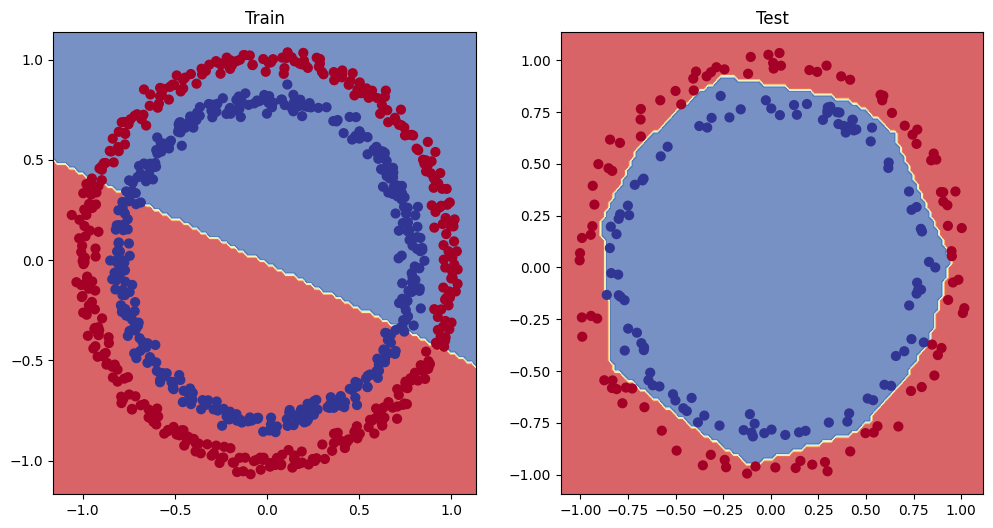

In [340]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot( 1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

**Challenge: ** can you improve model_3 to do better than 80% accuracy in test data

## 7. Replicating non-linear activation functions

Neural networks, ratther than us telling the model what to learn, we give it the tools to discover patterns i data and it tries to figure out the best patterns on its own

Ans these tools are linear & non-linear functions

In [341]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [342]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [343]:
# Visualize the tensor

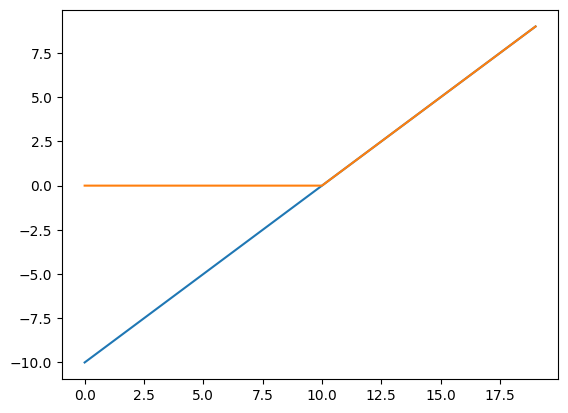

In [344]:
plt.plot(A)
plt.plot(torch.relu(A))

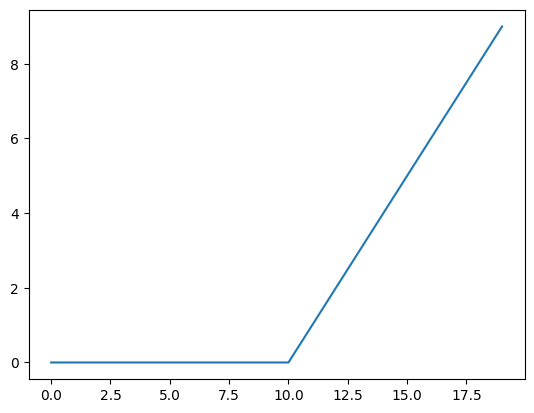

In [345]:
plt.plot(torch.relu(A))

In [346]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

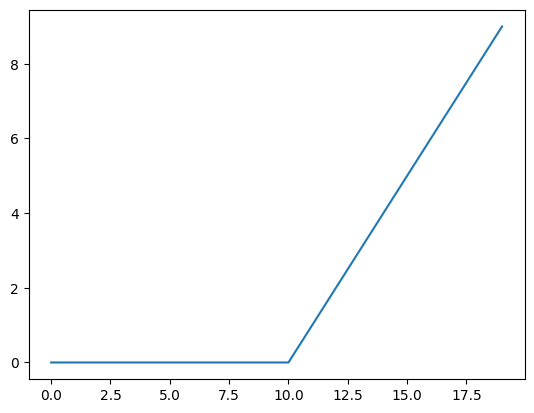

In [347]:
# Plot ReLU activation function
plt.plot(relu(A))

In [348]:
# Now lets do the same for Sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

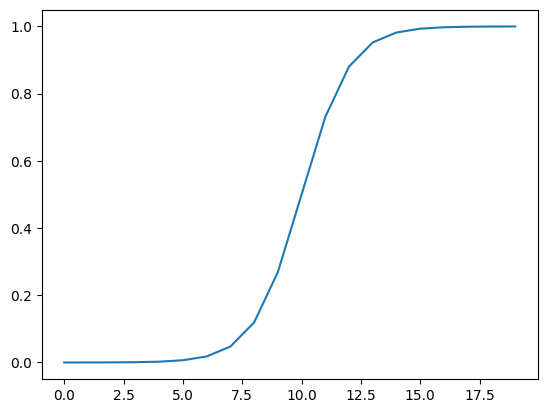

In [349]:
plt.plot(torch.sigmoid(A))

## 8. Putting it all together with multi-class classificaton problem

* Binary classification = one thing or another (cat vs dog, span vs. not spam, fraud or not fraud)

* Multi-class classfication = more than one thing or another (cat vs dog vs chicken)


## 8.1 Creating a toy multi-class dataset

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


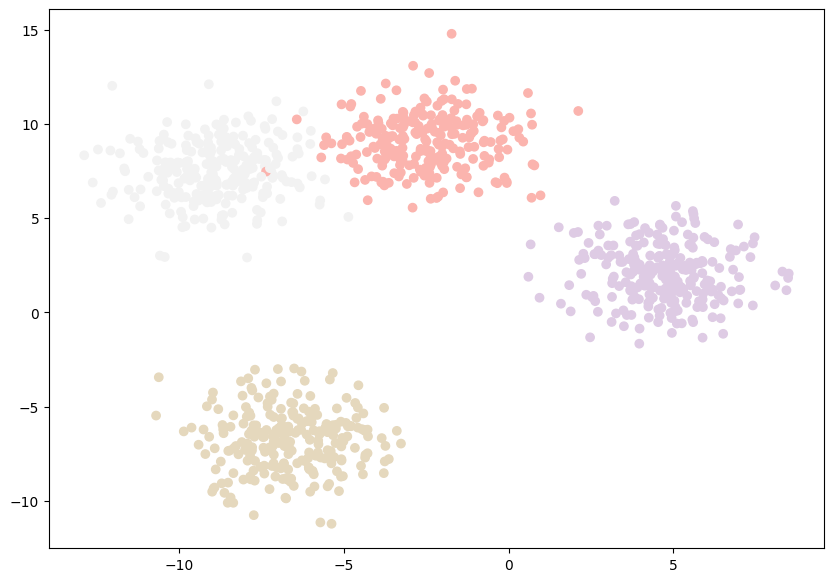

In [350]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up (try change this to 1.0, the default),
                            random_state=RANDOM_SEED
                            )

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) # torch.float -> float32, numpy() -> float64

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.Pastel1)

print(X_blob[:5], y_blob[:5])

### 8.2 Building a multi-class classification model in PyTorch

To do so, let's create a subclass of nn.Module that takes in three hyperparameters:

* input_features - the number of X features coming into the model.
* output_features - the ideal numbers of output features we'd like (this will be equivalent to NUM_CLASSES or the number of classes in your multi-class classification problem).
* hidden_units - the number of hidden neurons we'd like each hidden layer to use.

In [351]:
# Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [352]:
from torch import nn

# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes all required hyperparameters for a multi-class classification model.
        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.

        Returns:

        Example:

    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and set it to target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8)
model_4.to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [353]:
X_blob_train.shape, y_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), torch.Size([800]), tensor([1, 0, 2, 2, 0]))

In [354]:
torch.unique(y_blob_train) # -> y_train_blob has four unique value -> need to have four layers

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [355]:
# Create loss and optimizer
# loss function measures how wrong our predictions are
# optimizer update our model parameters to try and reduce the loss
loss_fn = nn.CrossEntropyLoss() # loss function for multi- classification
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # learning rate is a hyperparameter you can change

### 8.4 Getting prediction probailities for a multi-class PyTorch model


In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then prediction labels.

Logits (raw output of the model) -> Pred procs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)

In [356]:
model_4(X_blob_test.to(device))[:5]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [357]:
# Lets get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [358]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [359]:
#  Coanvert our model's outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])
print(y_blob_test[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')
tensor([1, 3, 2, 1, 0])


In [360]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [361]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [362]:
#  Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [363]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [364]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# if device == 'cuda':
#   X_blob_train, X_blob_test = X_blob_train.type(torch.cuda.LongTensor), X_blob_test.type(torch.cuda.LongTensor)

# X_blob_train.device, X_blob_test.device, X_blob_train.dtype,

# y_blob_train.device, y_blob_test.device, y_blob_train.dtype,


for epoch in range(epochs):
  ### Training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_blob_train) # model outputs raw logits
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

  # 2. calculate the loss and accuracy
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    y_test_logits = model_4(X_blob_test)
    y_test_pred   = torch.softmax(y_test_logits, dim=1).argmax(dim=1)

    loss_test = loss_fn(y_test_logits, y_blob_test)
    acc_test   = accuracy_fn(y_true=y_blob_test,
                             y_pred=y_test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.15883, Acc: 40.38% | Test Loss: 0.06591, Test Acc: 100.00%
Epoch: 10 | Loss: 0.64476, Acc: 96.75% | Test Loss: 0.06591, Test Acc: 100.00%
Epoch: 20 | Loss: 0.42535, Acc: 98.50% | Test Loss: 0.06591, Test Acc: 100.00%
Epoch: 30 | Loss: 0.25294, Acc: 99.12% | Test Loss: 0.06591, Test Acc: 100.00%
Epoch: 40 | Loss: 0.11232, Acc: 99.25% | Test Loss: 0.06591, Test Acc: 100.00%
Epoch: 50 | Loss: 0.06627, Acc: 99.25% | Test Loss: 0.06591, Test Acc: 100.00%
Epoch: 60 | Loss: 0.05068, Acc: 99.25% | Test Loss: 0.06591, Test Acc: 100.00%
Epoch: 70 | Loss: 0.04300, Acc: 99.25% | Test Loss: 0.06591, Test Acc: 100.00%
Epoch: 80 | Loss: 0.03836, Acc: 99.25% | Test Loss: 0.06591, Test Acc: 100.00%
Epoch: 90 | Loss: 0.03525, Acc: 99.25% | Test Loss: 0.06591, Test Acc: 100.00%


### 8.6 Making and evaluating predictions with PyTorch multi-class model

In [365]:
# Make Predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [366]:
# Turn predicted logits in prediction probability
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probability onto prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model_pred and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


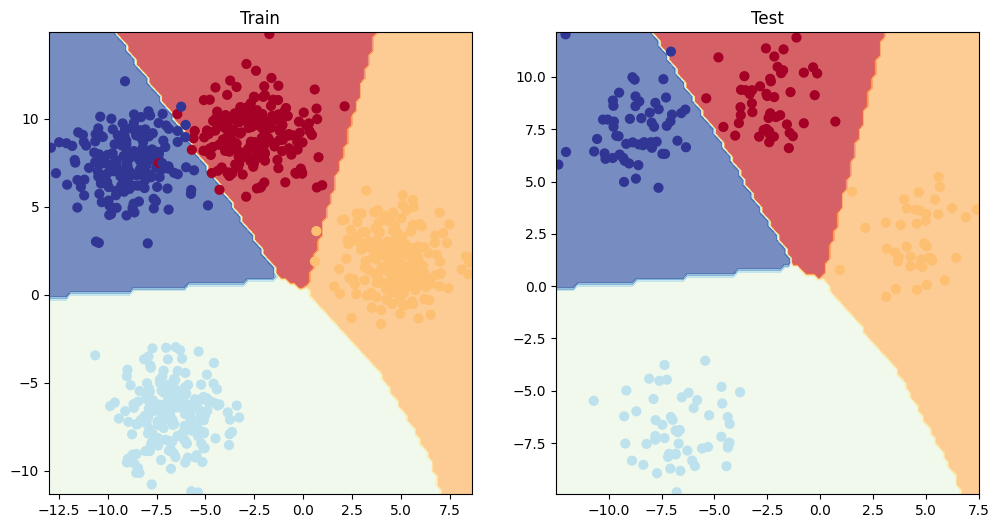

In [367]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?

* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report


See this article for when to use precisio/recall: https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/


if you want access to a lot of PyTorch metrics, see TorchMetrics - https://torchmetrics.readthedocs.io/en/stable/all-metrics.html


In [369]:
# Let's try the torchmetrics.Accuracy metric out.
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')